<a href="https://colab.research.google.com/github/nkevin90/Data-Structures/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing the Packages 

In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install sklearn
!pip install matplotlib
#installing the required libraries

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing the Libraries

In [ ]:
#pandas for Data manipulation
import pandas as pd
#Numpy fo numerical Analysis
import numpy as np
from scipy import stats
#Seaborn and Matplotlib for Data Viz
import seaborn as sns
import matplotlib.pyplot as plt
#Sklearn for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/siglimumuni/Datasets/master/telco_customer_churn.csv')
#Viewing the first five rows
print(df.head())
df.info()
#sns.displot(df, x="tenure", kde=True)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
#converting TotalCharges to numerical type
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

#Fill in null values with the average total charges 
df["TotalCharges"].fillna(np.mean(df["TotalCharges"]),inplace=True)

#Change the SeniorCitizen column to categorical
df["SeniorCitizen"] = df["SeniorCitizen"].map({1:"Yes",0:"No"})

#Check the summary statistics for the numeric columns
df.describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


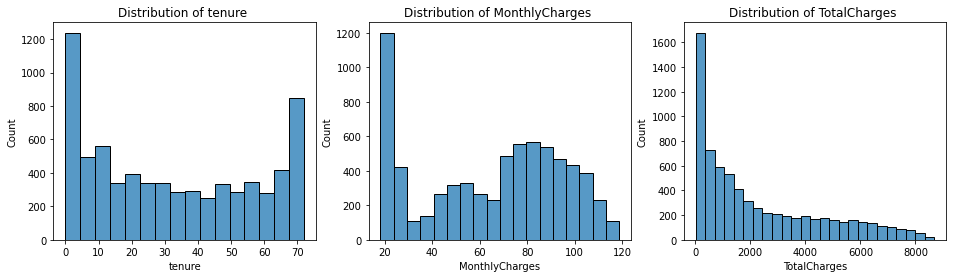

In [ ]:
#Create a subplots object with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=[16,4])

#Iterate through the sub plots and plot a histogram for each column
for i, col in enumerate(["tenure","MonthlyCharges","TotalCharges"]):
  sns.histplot(df[col],ax=axes[i]).set_title(f"Distribution of {col} ")

Text(0.5, 1.0, 'Correlation of tenure, MonthlyCharges and TotalCharges')

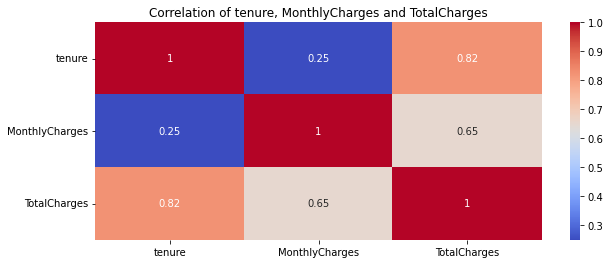

In [ ]:
#Create a correlation matrix
corr = df[["tenure","MonthlyCharges","TotalCharges"]].corr()

#create a heatmap from the matrix
plt.figure(figsize=[10,4])
sns.heatmap(corr,cmap="coolwarm",annot=True).set_title("Correlation of tenure, MonthlyCharges and TotalCharges")


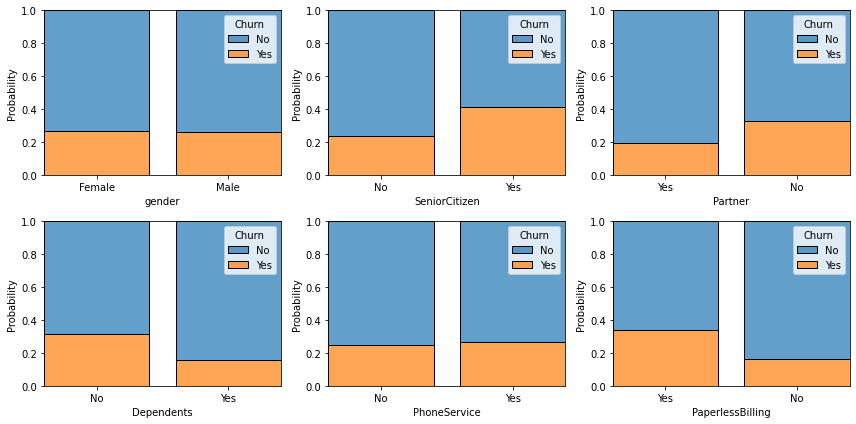

In [ ]:
#Create a list object with names of all binary categorical columns
bin_categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService','PaperlessBilling']

#Create a subplots object with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=[12,6])

#Iterate through the sub plots and plot a histogram for each column
for col,ax in zip(bin_categorical_cols,axes.ravel()):
  sns.histplot(df,x=col, hue="Churn",ax=ax,stat="probability", multiple="fill", shrink=.8,alpha=0.7)

#Space out the plots
plt.tight_layout()

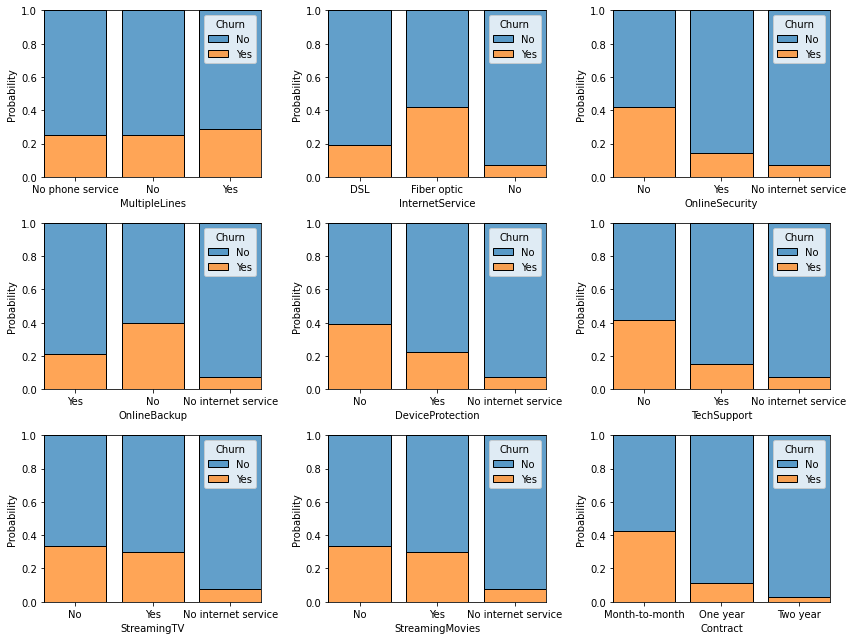

In [ ]:
#Create a list object with names of all ternary categorical columns
tri_categorical_cols = ['MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract']

#Create a subplots object with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=[12,9])

#Iterate through the sub plots and plot a histogram for each column
for col,ax in zip(tri_categorical_cols,axes.ravel()):
  sns.histplot(df,x=col, hue="Churn",ax=ax,stat="probability", multiple="fill", shrink=.8,alpha=0.7)

#Space out the plots
plt.tight_layout()

# building the model

In [ ]:

#Remove the customerID, gender and PhoneService columns
df.drop(columns=["customerID","gender","PhoneService"],axis=1,inplace=True)

#Split data into dependent(y) and independent variables(X)
X = df.drop("Churn",axis=1)
y = df["Churn"]

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
#Buid a decision tree model
tree_model = DecisionTreeClassifier()

#One hot encode the training data
X_train_encoded = pd.get_dummies(X_train,drop_first=True)

#Fit the training data to the model
tree_model.fit(X_train_encoded,y_train)

DecisionTreeClassifier()

In [ ]:
#One hot encode the test data
X_test_encoded = pd.get_dummies(X_test,drop_first=True)

#Run predictions with the model using the encoded test data
predictions = tree_model.predict(X_test_encoded)

# evaluating the model

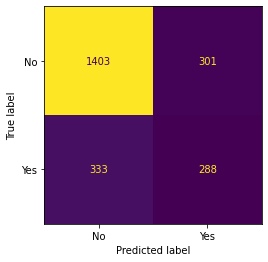

In [ ]:
#Visualize the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions,colorbar=False)
plt.show()

In [ ]:
#Print the classification report
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

          No       0.81      0.82      0.82      1704
         Yes       0.49      0.46      0.48       621

    accuracy                           0.73      2325
   macro avg       0.65      0.64      0.65      2325
weighted avg       0.72      0.73      0.72      2325



# RandomForest

In [ ]:
#Build the random forest model
rf_model = RandomForestClassifier()

#Fit the the training data to the model
rf_model.fit(X_train_encoded,y_train)

#Run predictions with the model
rf_predictions = rf_model.predict(X_test_encoded)

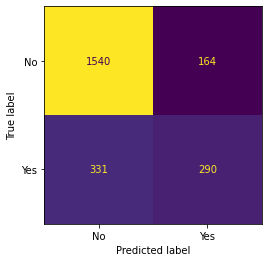

In [ ]:
#Print the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_predictions,colorbar=False)
plt.show()

In [ ]:
#Print the classification report 
rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1704
         Yes       0.64      0.47      0.54       621

    accuracy                           0.79      2325
   macro avg       0.73      0.69      0.70      2325
weighted avg       0.77      0.79      0.78      2325

